# Alpha-beta filter for smoothing sensor readings

https://en.wikipedia.org/wiki/Alpha_beta_filter

## Imports

In [1182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")


## Read raw sensor data

In [1183]:
# read data from file
with open('signal.txt', 'r') as f:
    data = f.readlines()

# convert data to floats
data = [list(map(float, line.split())) for line in data]

# zip data to columns
data = list(zip(*data))

time = np.array(data[0])
pressure = np.array(data[1])
temperature = np.array(data[2])
climbrate = np.array(data[3])
altitude = np.array(data[4])

# shift the time so it starts at 0
time = time - time[0]

## Filter class

In [1184]:
class AlphaBetaFilter:
    def __init__(self, alpha, beta, initial_value=0, initial_velocity=0, delta_t=1):
        self.alpha = alpha
        self.beta = beta
        self.estimate = initial_value
        self.velocity = initial_velocity
        self.delta_t = delta_t

    def update(self, measurement):
        # Predict
        self.estimate += self.velocity * self.delta_t

        # Update based on measurement
        error = measurement - self.estimate
        self.estimate += self.alpha * error
        self.velocity += (self.beta / self.delta_t) * error

        return self.estimate

## Filter pressure signal

### Alpha variation

(978.1, 978.4)

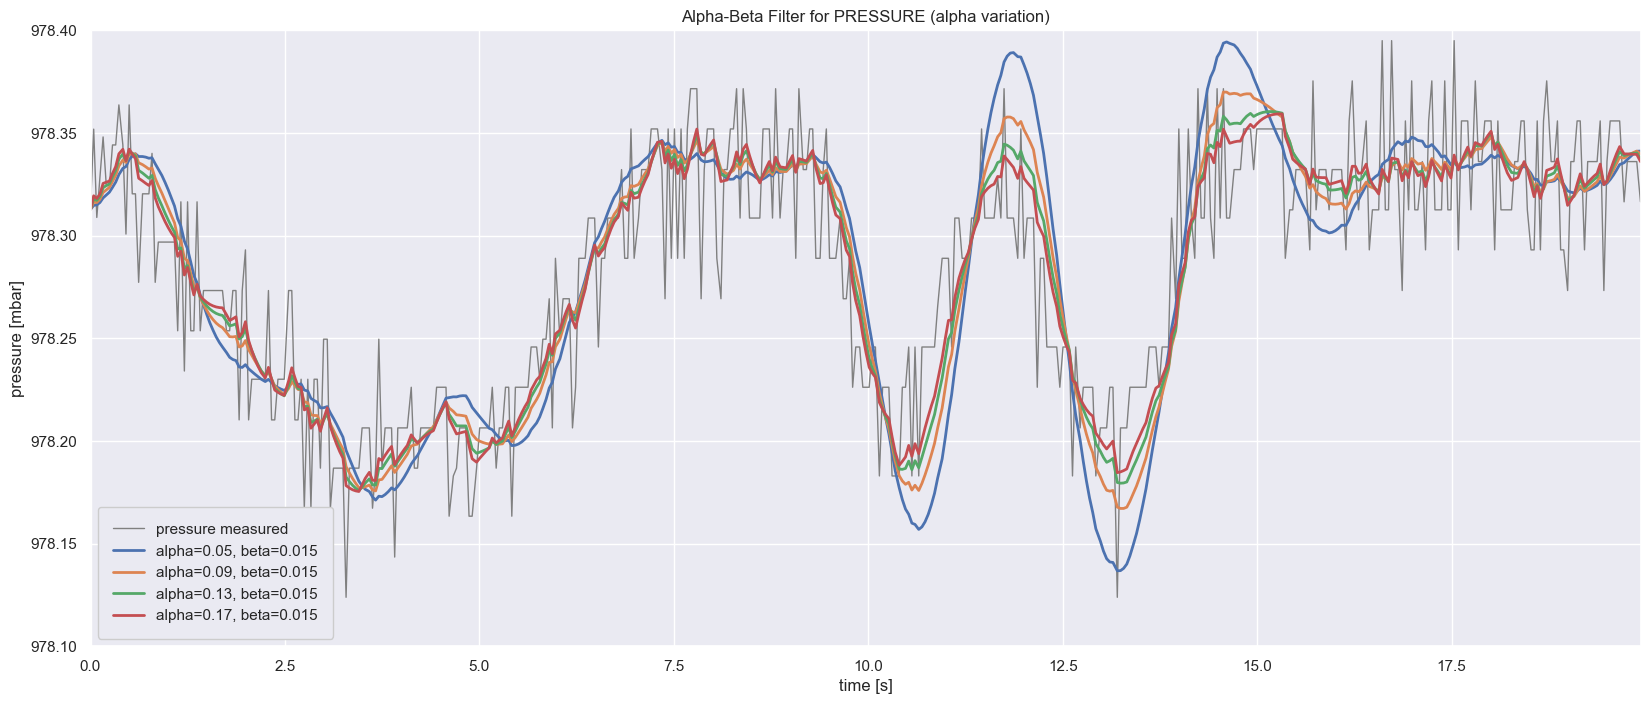

In [1185]:
# select measured quantity
quantity = pressure
label = 'pressure'
unit = 'mbar'

# filter design parameters
alphas = [0.05, 0.09, 0.13, 0.17]
betas = [0.015, 0.015, 0.015, 0.015]

# Initialize AlphaBetaFilter
abf = [AlphaBetaFilter(initial_value=quantity[0], alpha=a, beta=b)
       for a, b in zip(alphas, betas)]

# Apply AlphaBetaFilter for alpha, beta variations
filtered = [[abf[i].update(value) for value in quantity]
            for i in range(len(alphas))]

# plot quantity (raw and filtered)
plt.figure(figsize=(20, 8))
plt.plot(time, quantity, label=f'{label} measured', color='gray', lw=1)
for i, value in enumerate(filtered):
    plt.plot(time, value, label=f'alpha={alphas[i]}, beta={betas[i]}', lw=2)
plt.title(f'Alpha-Beta Filter for {label.upper()} (alpha variation)')
plt.xlabel('time [s]')
plt.ylabel(f'{label} [{unit}]')
plt.legend(loc='lower left', framealpha=1, borderpad=1)
plt.xlim(0, time[-1])
plt.ylim(978.1, 978.4)

### Beta variation

(978.1, 978.4)

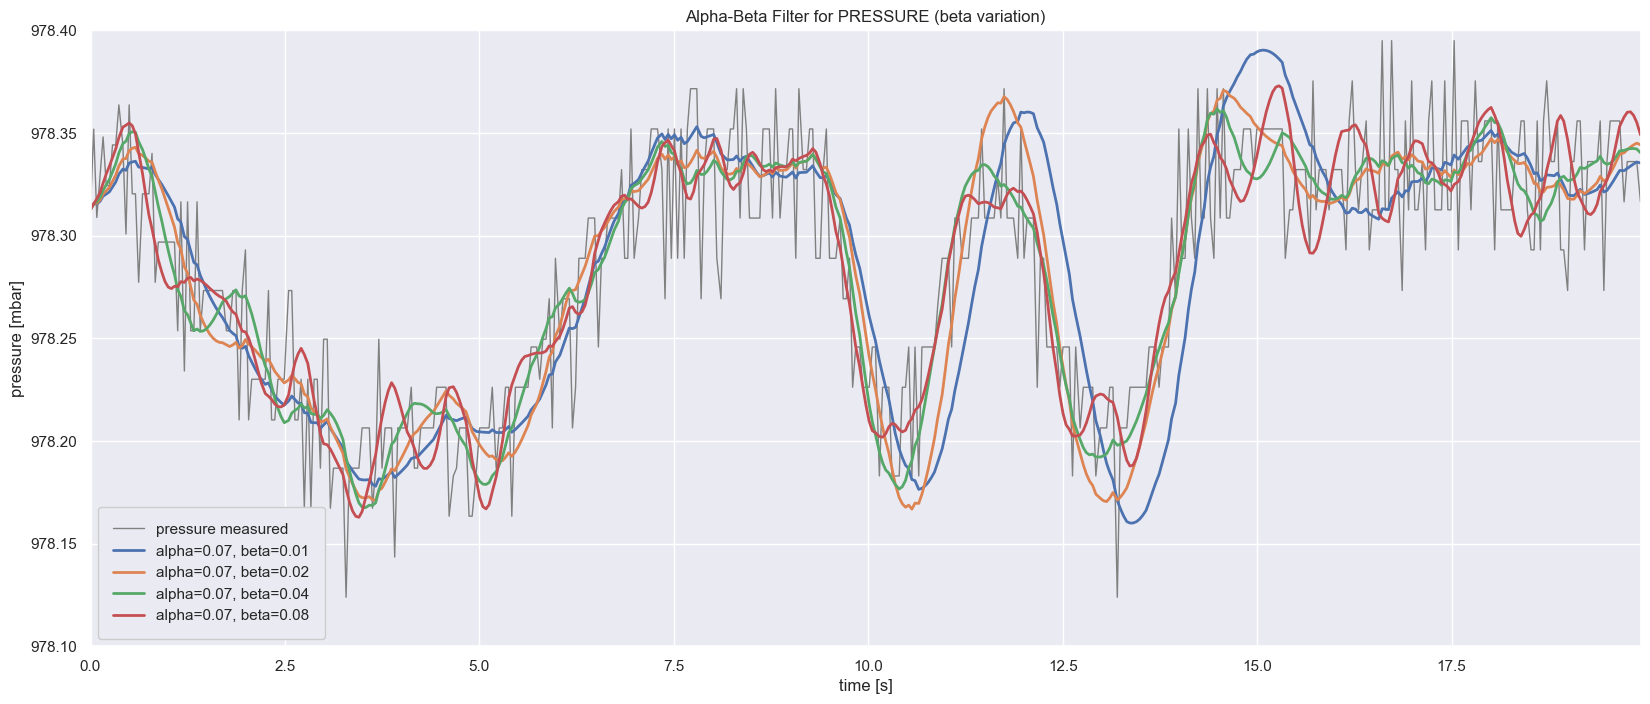

In [1186]:
# select measured quantity
quantity = pressure
label = 'pressure'
unit = 'mbar'

# filter design parameters
alphas = [0.07, 0.07, 0.07, 0.07]
betas = [0.01, 0.02, 0.04, 0.08]

# Initialize AlphaBetaFilter
abf = [AlphaBetaFilter(initial_value=quantity[0], alpha=a, beta=b)
       for a, b in zip(alphas, betas)]

# Apply AlphaBetaFilter for alpha, beta variations
filtered = [[abf[i].update(value) for value in quantity]
            for i in range(len(alphas))]

# plot quantity (raw and filtered)
plt.figure(figsize=(20, 8))
plt.plot(time, quantity, label=f'{label} measured', color='gray', lw=1)
for i, value in enumerate(filtered):
    plt.plot(time, value, label=f'alpha={alphas[i]}, beta={betas[i]}', lw=2)
plt.title(f'Alpha-Beta Filter for {label.upper()} (beta variation)')
plt.xlabel('time [s]')
plt.ylabel(f'{label} [{unit}]')
plt.legend(loc='lower left', framealpha=1, borderpad=1)
plt.xlim(0, time[-1])
plt.ylim(978.1, 978.4)


### Selected filter settings

(978.1, 978.4)

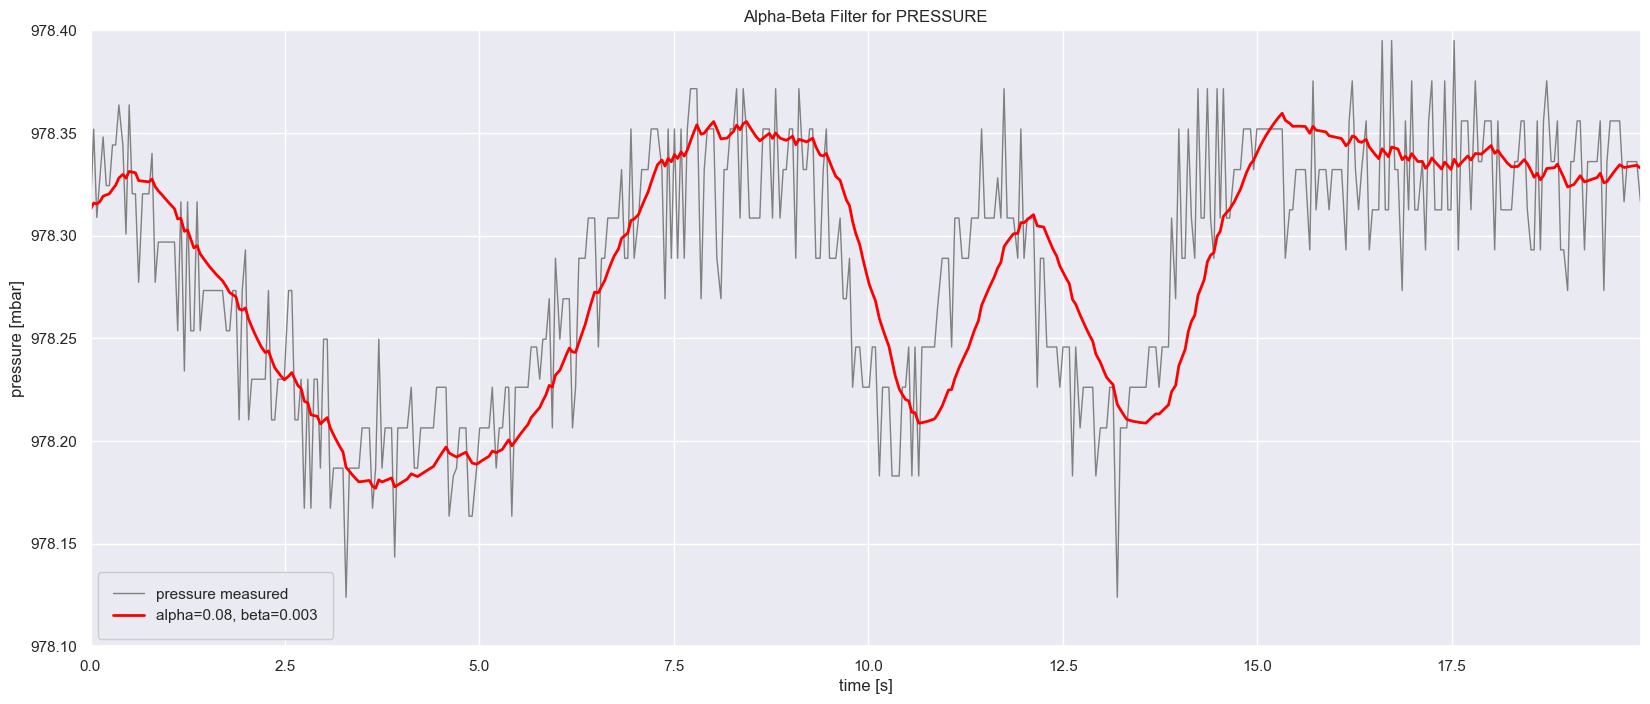

In [1187]:
# select measured quantity
quantity = pressure
label = 'pressure'
unit = 'mbar'

# filter design parameters
alphas = [0.08]
betas = [0.003]

# Initialize AlphaBetaFilter
abf = [AlphaBetaFilter(initial_value=quantity[0], alpha=a, beta=b)
       for a, b in zip(alphas, betas)]

# Apply AlphaBetaFilter for alpha, beta variations
filtered = [[abf[i].update(value) for value in quantity]
            for i in range(len(alphas))]

# plot quantity (raw and filtered)
plt.figure(figsize=(20, 8))
plt.plot(time, quantity, label=f'{label} measured', color='gray', lw=1)
for i, value in enumerate(filtered):
    plt.plot(
        time, value, label=f'alpha={alphas[i]}, beta={betas[i]}', color='red', lw=2)
plt.title(f'Alpha-Beta Filter for {label.upper()}')
plt.xlabel('time [s]')
plt.ylabel(f'{label} [{unit}]')
plt.legend(loc='lower left', framealpha=1, borderpad=1)
plt.xlim(0, time[-1])
plt.ylim(978.1, 978.4)


## Altitude

In [1188]:
def calc_altitude(pressure):
    '''The following variables are constants for a standard atmosphere
        t0 = 288.15 # sea level standard temperature (K)
        p0 = 101325.0 # sea level standard atmospheric pressure (Pa)
        gamma = 6.5 / 1000.0 # temperature lapse rate (K / m)
        g = 9.80665 # gravity constant (m / s^2)
        R = 8.314462618 # mol gas constant (J / (mol * K))
        Md = 28.96546e-3 # dry air molar mass (kg / mol)
        Rd =  R / Md
        return (t0 / gamma) * (1.0 - (pressure / p0)**(Rd * gamma / g))
        '''
    return 44330.76923 * (1.0 - (pressure / 101325.0)**0.19025954)

### Calulate altitude from filtered pressure

In [1189]:
# altitude from filtered pressure signal
altitude = calc_altitude(np.array(filtered[0])*100.0)

# shift so that initial altitude is 0
altitude_0 = altitude[0]
altitude = altitude - altitude_0

(0.0, 19.929)

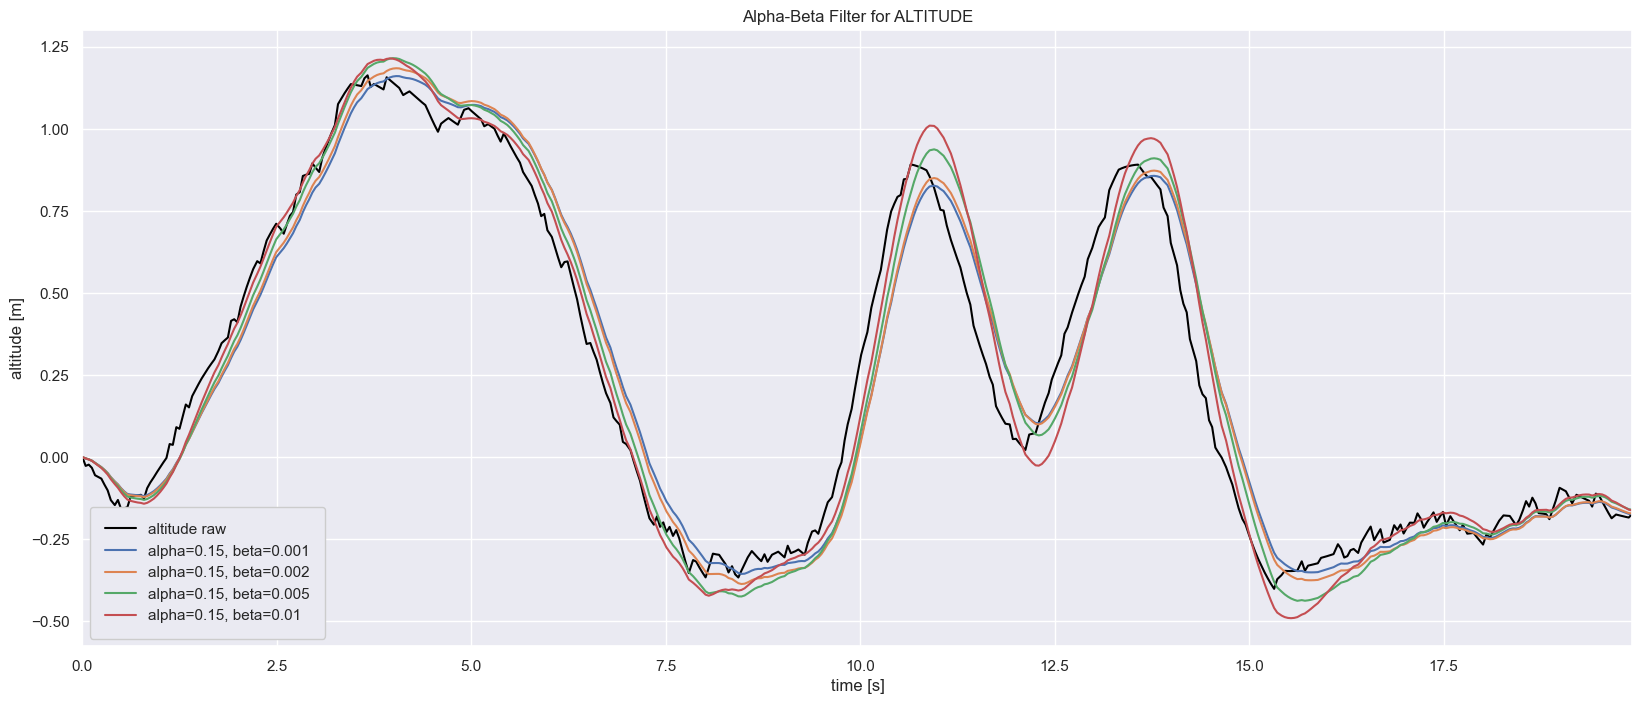

In [1190]:
# select measured quantity
quantity = altitude
label = 'altitude'
unit = 'm'

# filter design parameters
alphas = [0.15, 0.15, 0.15, 0.15]
betas = [0.001, 0.002, 0.005, 0.01]

# Initialize AlphaBetaFilter
abf = [AlphaBetaFilter(initial_value=quantity[0], alpha=a, beta=b) for a, b in zip(alphas, betas)]

# Apply AlphaBetaFilter for alpha, beta variations
filtered = [[abf[i].update(value) for value in quantity] for i in range(len(alphas))]

# plot quantity
plt.figure(figsize=(20, 8))
# plot all variations
plt.plot(time, quantity, label=f'{label} raw', color='black')
for i, value in enumerate(filtered):
    plt.plot(time, value, label=f'alpha={alphas[i]}, beta={betas[i]}')
plt.title(f'Alpha-Beta Filter for {label.upper()}')
plt.xlabel('time [s]')
plt.ylabel(f'{label} [{unit}]')
plt.legend(loc='lower left', framealpha=1, borderpad=1)
plt.xlim(0, time[-1])
#plt.ylim(978.1, 978.4)

## Climbrate

In [1191]:
# calculate time steps between two consecutive measurements
dt = time[1:] - time[:-1]

# calculate the altitude difference between two consecutive measurements
# use the filtered altitude values
dz_filtered = np.array(filtered[3][1:]) - np.array(filtered[3][:-1])

# climbrate without deadzone filtering
climbrate = dz_filtered / (dt + 1.e-9)


In [1192]:
len(climbrate)

472

In [1193]:
len(time)

473

(0.0, 19.929)

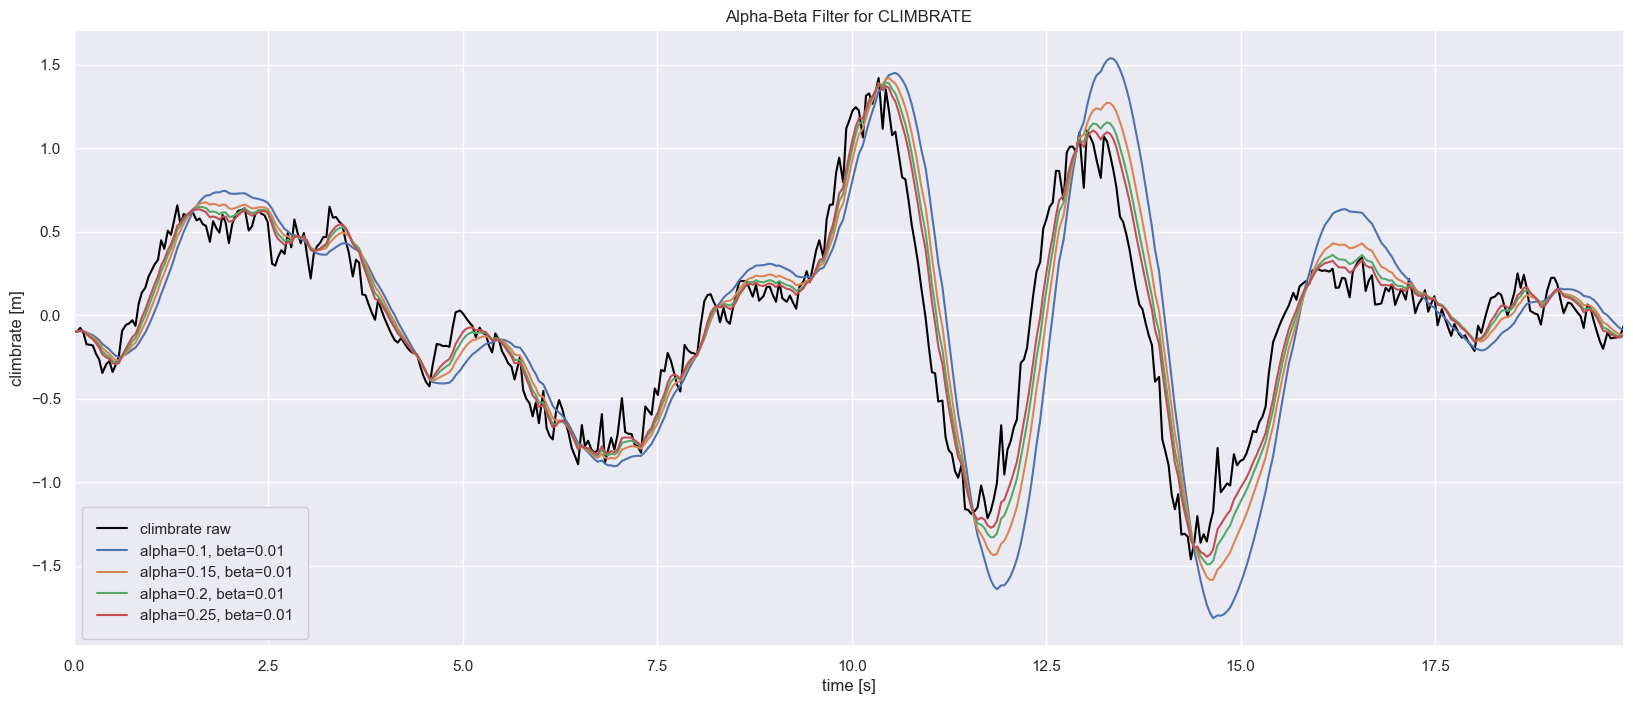

In [1194]:
# insert first value to keep length of quantity and filtered equal
climbrate = np.insert(climbrate, 0, climbrate[0])
# select measured quantity
quantity = climbrate
label = 'climbrate'
unit = 'm'

# filter design parameters
alphas = [0.1, 0.15, 0.2, 0.25]
betas = [0.01, 0.01, 0.01, 0.01]

# Initialize AlphaBetaFilter
abf = [AlphaBetaFilter(initial_value=quantity[0], alpha=a, beta=b)
       for a, b in zip(alphas, betas)]

# Apply AlphaBetaFilter for alpha, beta variations
filtered = [[abf[i].update(value) for value in quantity]
            for i in range(len(alphas))]

# plot quantity
plt.figure(figsize=(20, 8))
# plot all variations
plt.plot(time, quantity, label=f'{label} raw', color='black')
for i, value in enumerate(filtered):
    plt.plot(time, value, label=f'alpha={alphas[i]}, beta={betas[i]}')
plt.title(f'Alpha-Beta Filter for {label.upper()}')
plt.xlabel('time [s]')
plt.ylabel(f'{label} [{unit}]')
plt.legend(loc='lower left', framealpha=1, borderpad=1)
plt.xlim(0, time[-1])
#plt.ylim(978.1, 978.4)


## Temperature

(33.0, 34.0)

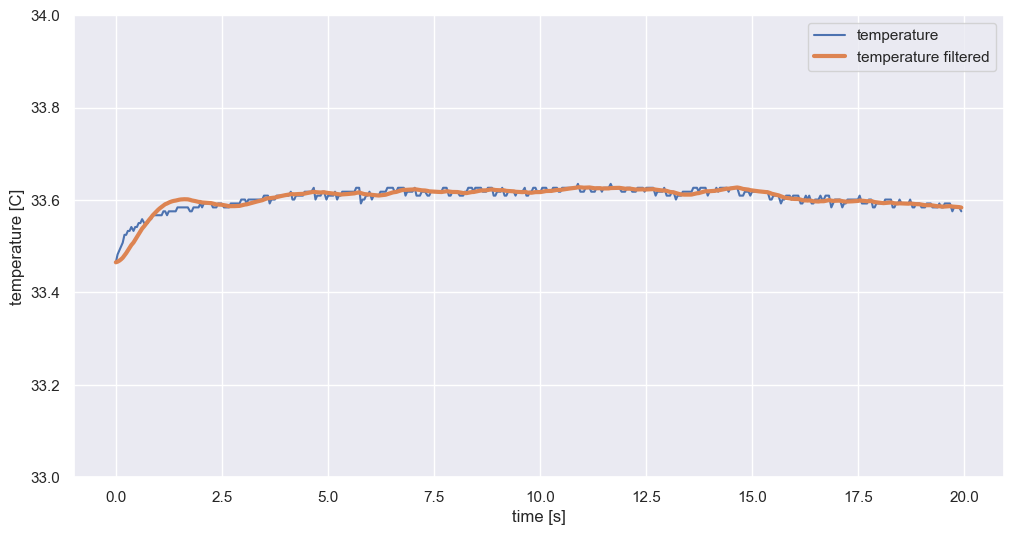

In [1195]:
# Initialize AlphaBetaFilter
abf = AlphaBetaFilter(initial_value=temperature[0], alpha=0.08, beta=0.01)

# Apply AlphaBetaFilter to measurements
temperature_filtered = [abf.update(cr) for cr in temperature]

# plot temperature
plt.figure(figsize=(12, 6))
plt.plot(time, temperature, label='temperature')
plt.plot(time, temperature_filtered, label='temperature filtered', lw=3)
plt.xlabel('time [s]')
plt.ylabel('temperature [C]')
plt.legend()
plt.ylim(33, 34)
